<a href="https://colab.research.google.com/github/melibrun/python/blob/main/%D0%BF%D0%B0%D0%BD%D0%B4%D0%B0%D1%81_%D0%B8_%D0%BC%D0%B0%D1%82%D0%BF%D0%BB%D0%BE%D1%82%D0%BB%D0%B8%D0%B1_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%BA%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Набор задач по Matplotlib и Pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pandas

#### Задача 5

Скачайте [датасет "Titanic"](https://kodomo.fbb.msu.ru/FBB/external/py_mipt/lec12_pandas/data/titanic_train.csv) в формате CSV. Загрузите его в Pandas.

In [ ]:
!wget https://kodomo.fbb.msu.ru/FBB/external/py_mipt/lec14_pandas_plus/data/titanic_train.csv



--2021-12-04 18:56:11--  https://kodomo.fbb.msu.ru/FBB/external/py_mipt/lec14_pandas_plus/data/titanic_train.csv
Resolving kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)... 93.180.63.127
Connecting to kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘titanic_train.csv.1’

titanic_train.csv.1 100%[===================>]  59.76K   265KB/s    in 0.2s    

2021-12-04 18:56:12 (265 KB/s) - ‘titanic_train.csv.1’ saved [61194/61194]



In [ ]:
titanic = pd.read_csv("./titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Задача 6

Запросите из таблицы колонки с полом, возрастом и классом каюты для пассажиров. Постройте графики распределений каждой из этих переменных (в отдельности).

In [ ]:
gender = titanic ["Sex"]
age = titanic ["Age"]
pclass = titanic ["Pclass"]


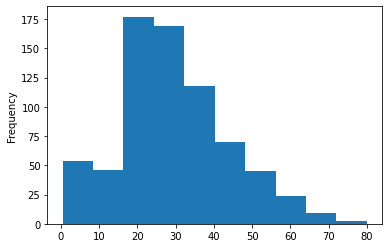

In [ ]:
age.plot.hist()

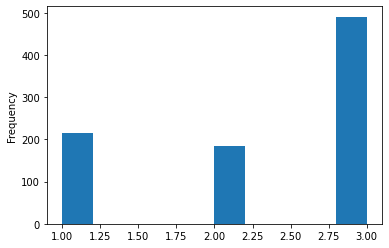

In [ ]:
pclass.plot.hist()

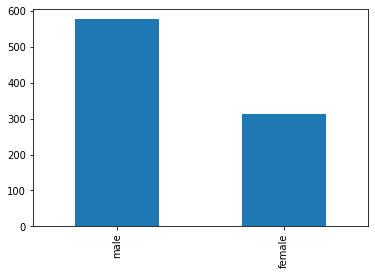

In [ ]:
gender.value_counts().plot.bar()

#### Задача 7

Создайте в таблице колонку `Fare_USD` с ценой в долларах. Считайте, что 1 фунт равен примерно 1.6 доллара.

In [ ]:
price = titanic["Fare"] * 1.6
titanic["Fare_USD"] = price
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_USD
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,11.60000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,114.05328
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,12.68000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,84.96000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,12.88000


#### Задача 8

Рассчитайте средние стоимости билета при посадке в Саутхемптоне, Шербуре и Квинстауне. Визуализируйте распределения цен.

In [ ]:
s = titanic.groupby("Embarked").mean()["Fare"]
s

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

#### Задача 9

Постройте сводную таблицу с количествами пассажиров в зависимости от их класса и города посадки на корабль.

In [ ]:
crtab = pd.crosstab(titanic['Embarked'], titanic['Pclass'])
crtab

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


### Синтез знаний

#### Задача 10

Загрузите [датасет Heart UCI](https://kodomo.fbb.msu.ru/FBB/external/pyintensive/day6/data/Heart_UCI_modified.csv). Выполните следующие задания:

1. Посчитайте количество пациентов каждого пола (можно сделать в одну строчку!).
2. Вычислите средний уровень холестерола в крови всех пациентов.
3. Сделайте фильтрацию уровня холестерола по полу пациента (создайте два `Series` с холестеролом мужчин и женщин).
4. Посчитайте средние уровни холестерола для каждого пола. Сделайте выводы.
5. Предложите статистический тест для оценки значимости различия средних значений.

In [ ]:
!wget https://kodomo.fbb.msu.ru/FBB/external/pyintensive/day6/data/Heart_UCI_modified.csv

--2021-12-04 18:56:13--  https://kodomo.fbb.msu.ru/FBB/external/pyintensive/day6/data/Heart_UCI_modified.csv
Resolving kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)... 93.180.63.127
Connecting to kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28752 (28K) [text/csv]
Saving to: ‘Heart_UCI_modified.csv.2’

Heart_UCI_modified. 100%[===================>]  28.08K  --.-KB/s    in 0.1s    

2021-12-04 18:56:13 (248 KB/s) - ‘Heart_UCI_modified.csv.2’ saved [28752/28752]



In [ ]:
heart_uci = pd.read_csv("./Heart_UCI_modified.csv")
heart_uci.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,Rest_ECG,Max_heart_rate,Exercise_angina,Exercise_ST_depression,ST_peak_slope,Vessels_colored,Heart_disease
0,63,male,non-anginal pain,145,233,> 120 mg/dl,normal,150,no angina,2.3,upsloping,0,diseased
1,37,male,atypical angina,130,250,< 120 mg/dl,ST-T wave abnormality,187,no angina,3.5,upsloping,0,diseased
2,41,female,typical angina,130,204,< 120 mg/dl,normal,172,no angina,1.4,downsloping,0,diseased
3,56,male,typical angina,120,236,< 120 mg/dl,ST-T wave abnormality,178,no angina,0.8,downsloping,0,diseased
4,57,female,asymptomatic,120,354,< 120 mg/dl,ST-T wave abnormality,163,angina,0.6,downsloping,0,diseased


In [ ]:
heart_uci["Sex"].value_counts()

male      207
female     96
Name: Sex, dtype: int64

In [ ]:
mean_ch = heart_uci['Serum_cholesterol'].mean()
mean_ch

246.26402640264027

In [ ]:
mean_all = heart_uci.groupby("Sex").mean()[['Serum_cholesterol']]
mean_all.head()

,Serum_cholesterol
Sex,
female,261.302083
male,239.289855


In [ ]:
#for male
m = heart_uci["Sex"] == "male"
heart_uci_male = heart_uci[m]
import scipy
stat, p = scipy.stats.shapiro(heart_uci_male['Serum_cholesterol']) # тест Шапиро-Уилк 
print('Statistics=%.3f, p-value=%.3f' % (stat, p)) 
alpha = 0.05 
if p > alpha: 
  print('Принять гипотезу о нормальности') 
else: 
  print('Отклонить гипотезу о нормальности')

Statistics=0.994, p-value=0.527
Принять гипотезу о нормальности


In [ ]:
#for male
f = heart_uci["Sex"] == "female"
heart_uci_female = heart_uci[f]
import scipy
stat, p = scipy.stats.shapiro(heart_uci_female['Serum_cholesterol']) # тест Шапиро-Уилк 
print('Statistics=%.3f, p-value=%.3f' % (stat, p)) 
alpha = 0.05 
if p > alpha: 
  print('Принять гипотезу о нормальности') 
else: 
  print('Отклонить гипотезу о нормальности')

Statistics=0.923, p-value=0.000
Отклонить гипотезу о нормальности


значится используем непараметрические критерии (манна уитни?)

In [ ]:
scipy.stats.mannwhitneyu(heart_uci_female['Serum_cholesterol'],
                         heart_uci_male['Serum_cholesterol'])


MannwhitneyuResult(statistic=8070.0, pvalue=0.004277542430612009)

p.value < 0.05, принимаем, различия есть